In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

In [2]:
#loading the nlp model
with open('./../models/nlp_model.pkl', 'rb') as file:
    nlp_model = pickle.load(file)

In [5]:
label_dict = {0: 'letter',
        1: 'form',
        2: 'email',
        3: 'handwritten',
        4: 'advertisement',
        5: 'scientific report',
        6: 'scientific publication',
        7: 'specification',
        8: 'file folder',
        9: 'news article',
        10: 'budget',
        11: 'invoice',
        12: 'presentation',
        13: 'questionnaire',
        14: 'resume',
        15: 'memo'}

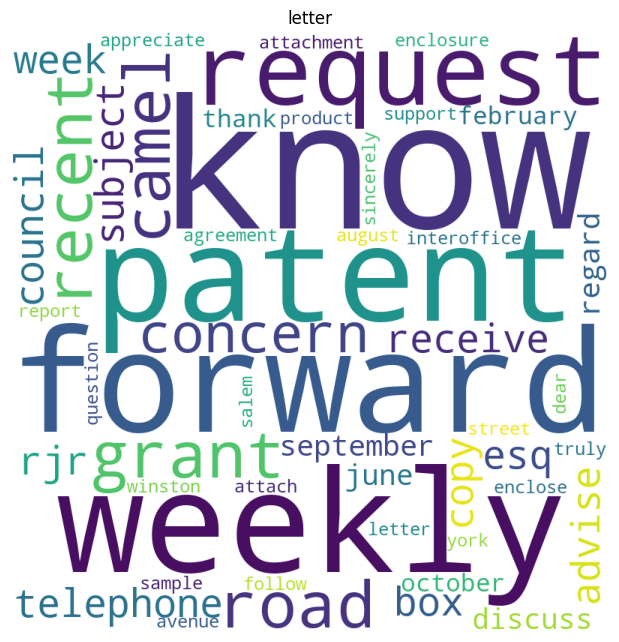

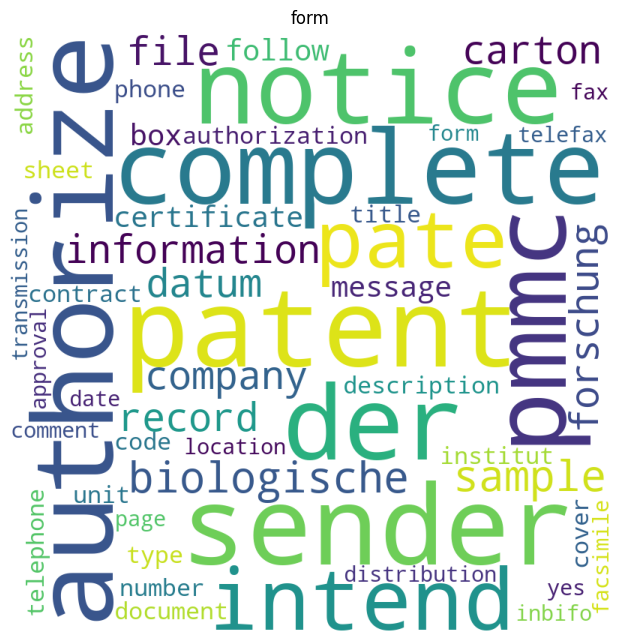

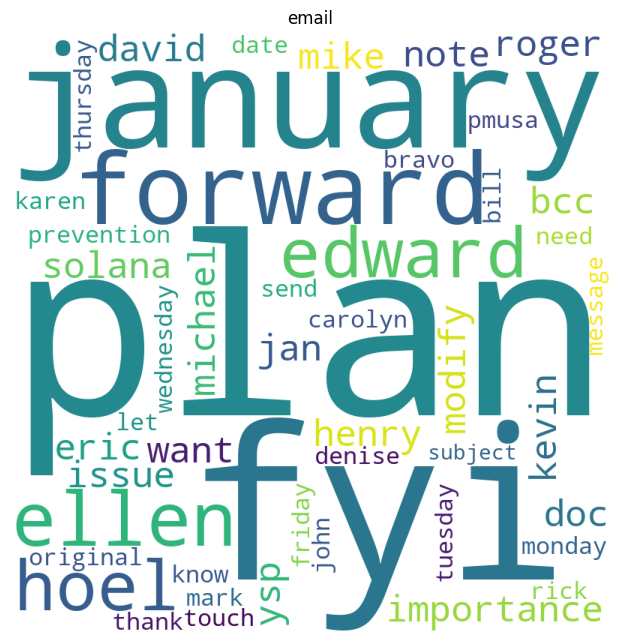

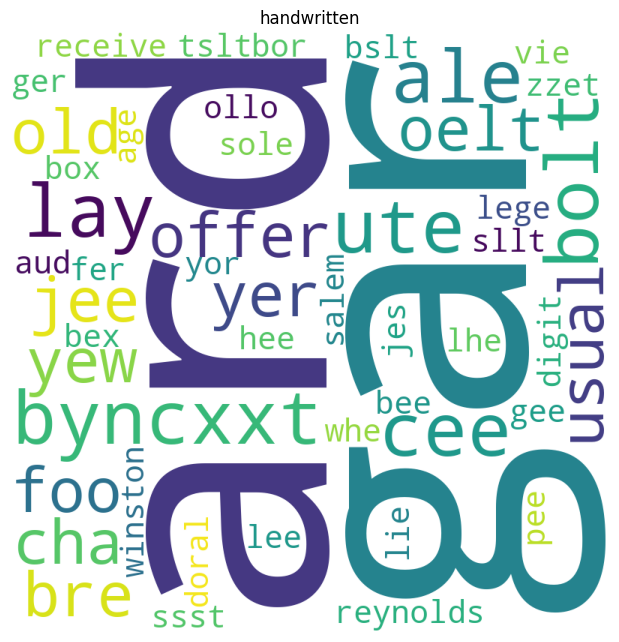

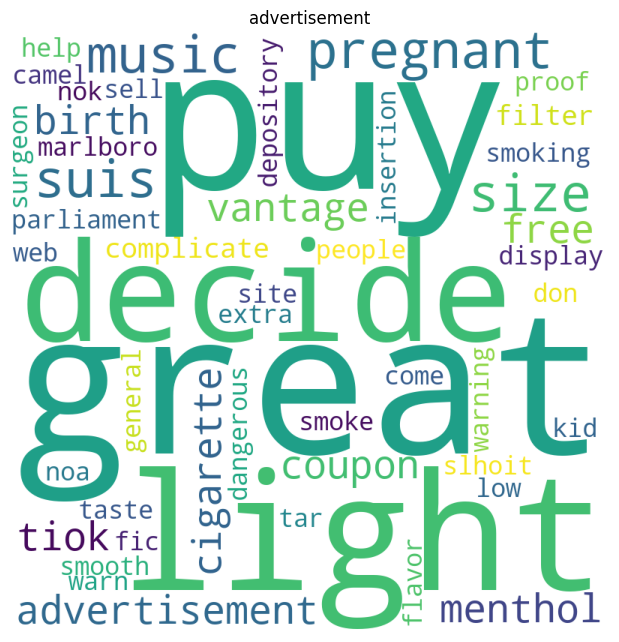

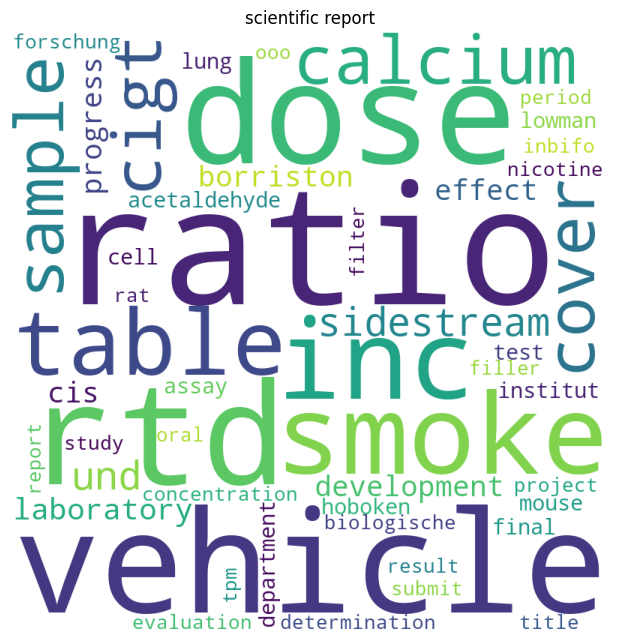

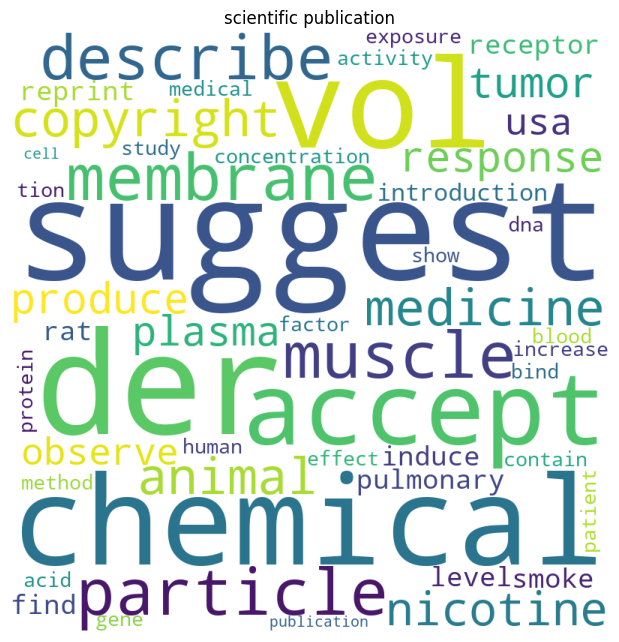

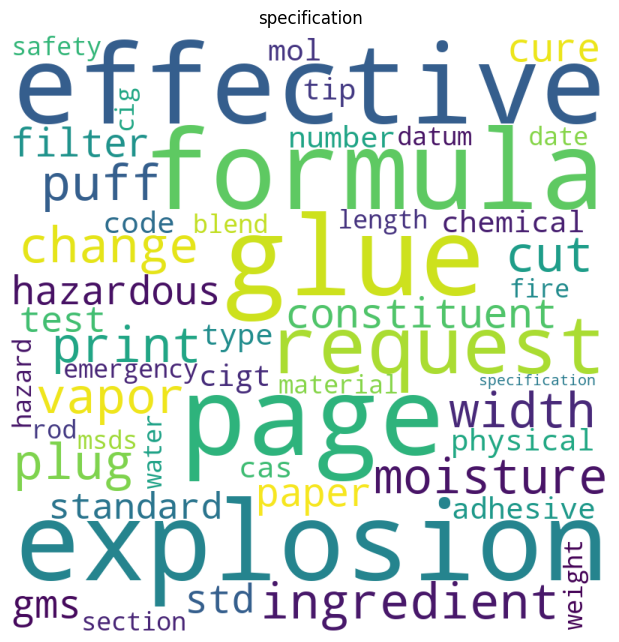

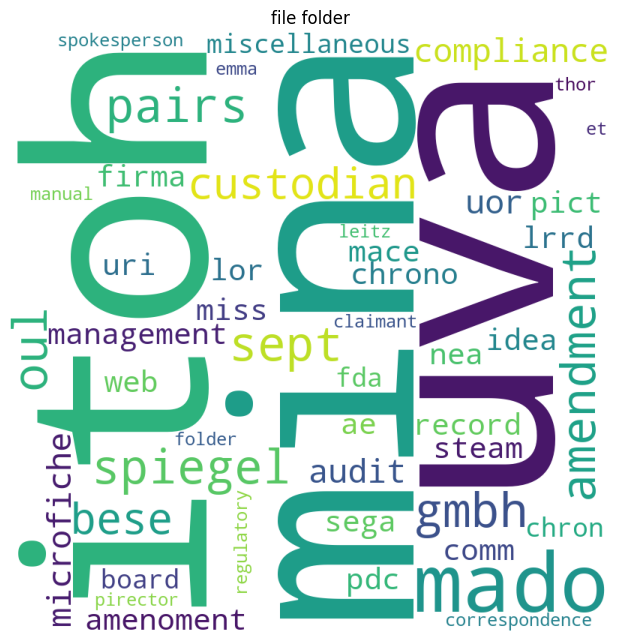

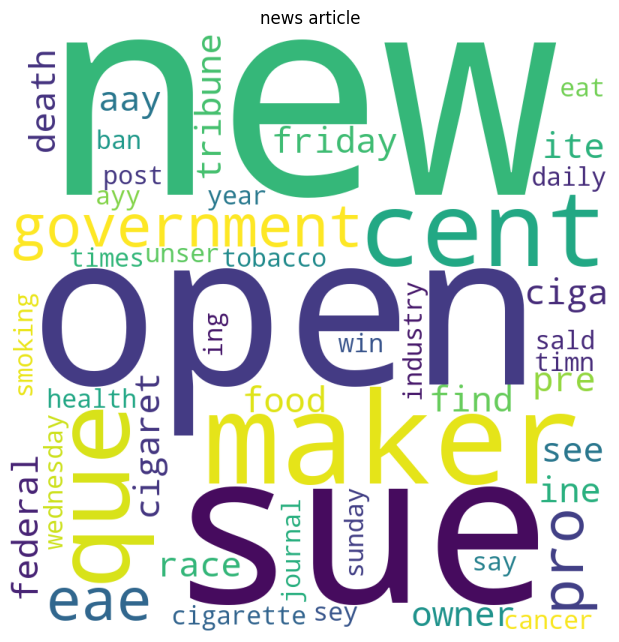

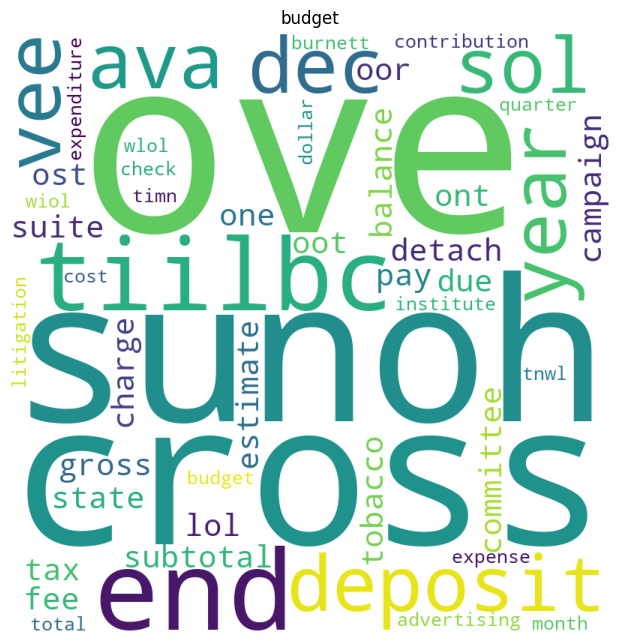

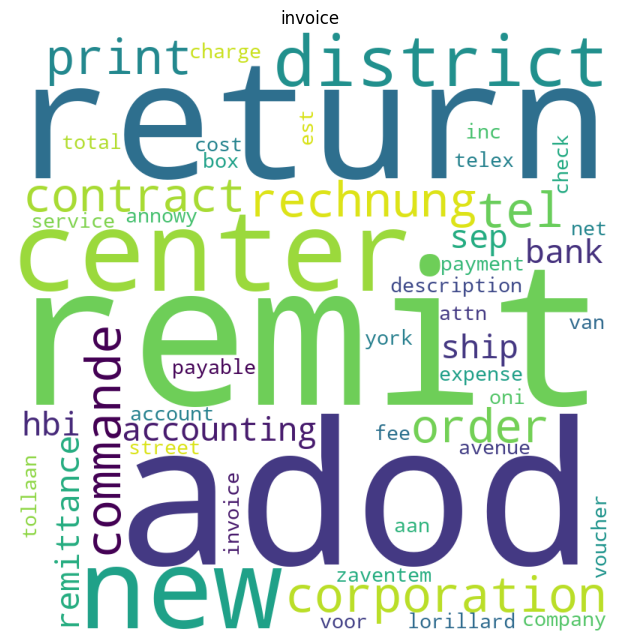

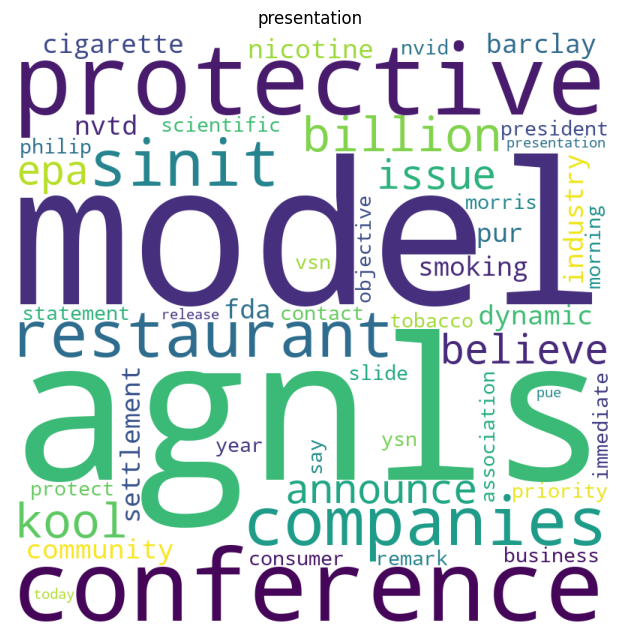

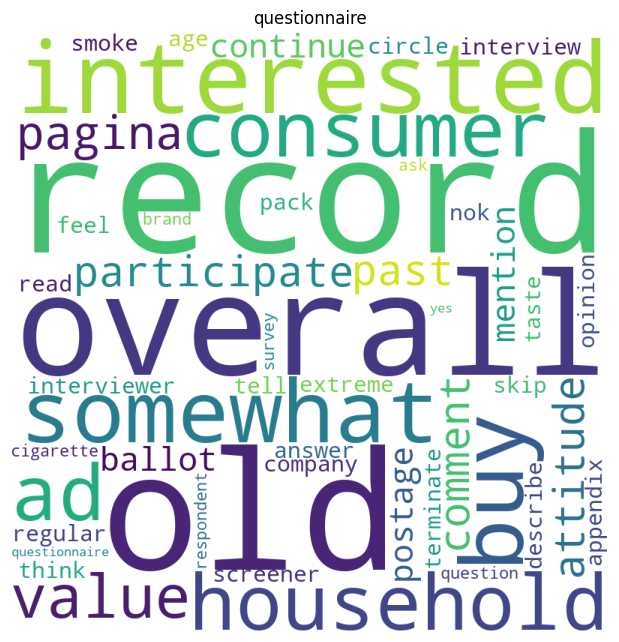

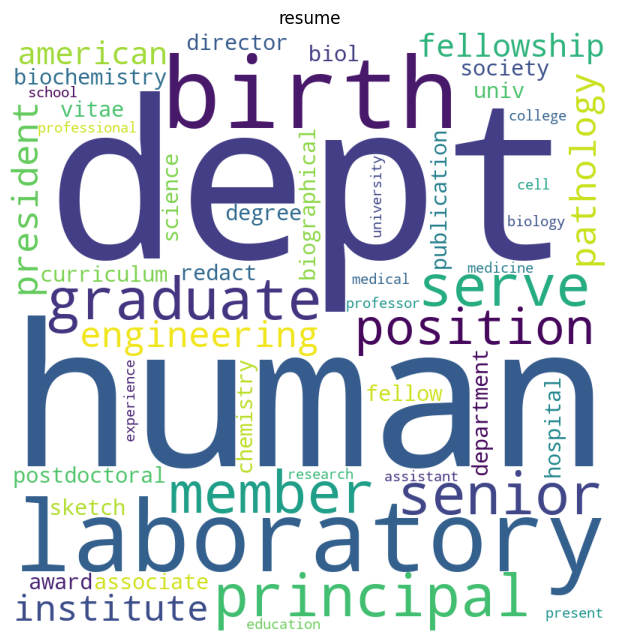

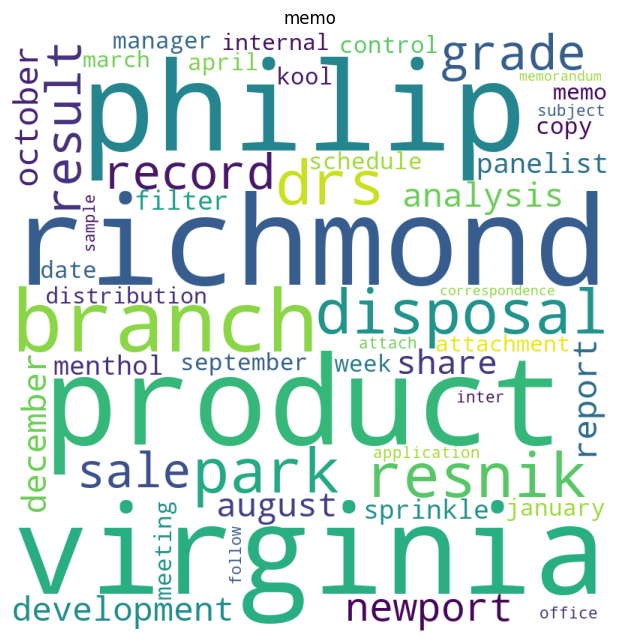

In [8]:
#getting the feature names and coefficients
coefficients = nlp_model.named_steps['clf'].coef_
feature_names = nlp_model.named_steps['vect'].get_feature_names_out()

#finding the top 50 features for each class and printing a wordcloud
for i in range(coefficients.shape[0]):
    top20 = np.argsort(coefficients[i])[-50:]
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = None, 
                min_font_size = 10).generate(" ".join([feature_names[j] for j in top20]))
    plt.figure(figsize = (6, 6), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(label_dict[i])
    plt.show()